In [26]:
# ============================================================================
# IMPORT LIBRARIES AND SETUP
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11

print("✅ All libraries imported successfully!")
print("✅ Plotting style configured!")

✅ All libraries imported successfully!
✅ Plotting style configured!


In [27]:
# ============================================================================
# DATA LOADING
# ============================================================================

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

print("\n" + "="*50)
print("STEP 1: DATA LOADING")
print("="*50)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

print(f"\n🔍 First 5 rows:")
print(df.head())


STEP 1: DATA LOADING
✅ Dataset loaded successfully!
📊 Dataset shape: (200, 5)
📋 Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

🔍 First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [28]:
# ============================================================================
# DATA EXPLORATION
# ============================================================================

print("\n" + "="*50)
print("STEP 2: DATA EXPLORATION")
print("="*50)

# Basic information
print("📈 Dataset Info:")
print(df.info())

print(f"\n🔍 Missing Values Check:")
print(df.isnull().sum())

print(f"\n🔍 Duplicate Rows: {df.duplicated().sum()}")

print(f"\n📊 Statistical Summary:")
print(df.describe())


STEP 2: DATA EXPLORATION
📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

🔍 Missing Values Check:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

🔍 Duplicate Rows: 0

📊 Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               

In [29]:
# ============================================================================
# DATA PREPROCESSING
# ============================================================================

print("\n" + "="*50)
print("STEP 3: DATA PREPROCESSING")
print("="*50)

# Create a copy for preprocessing
df_clean = df.copy()

# Remove CustomerID (not useful for clustering)
df_clean.drop('CustomerID', axis=1, inplace=True)
print("✅ Removed CustomerID column")

# Encode Gender: Male=0, Female=1
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
print("✅ Gender encoded: Male=0, Female=1")

print(f"\n📊 Final dataset shape: {df_clean.shape}")
print(f"📋 Final columns: {list(df_clean.columns)}")

print(f"\n🔍 Processed data preview:")
print(df_clean.head())


STEP 3: DATA PREPROCESSING
✅ Removed CustomerID column
✅ Gender encoded: Male=0, Female=1

📊 Final dataset shape: (200, 4)
📋 Final columns: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

🔍 Processed data preview:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40



STEP 4: VISUAL EXPLORATION - DISTRIBUTIONS


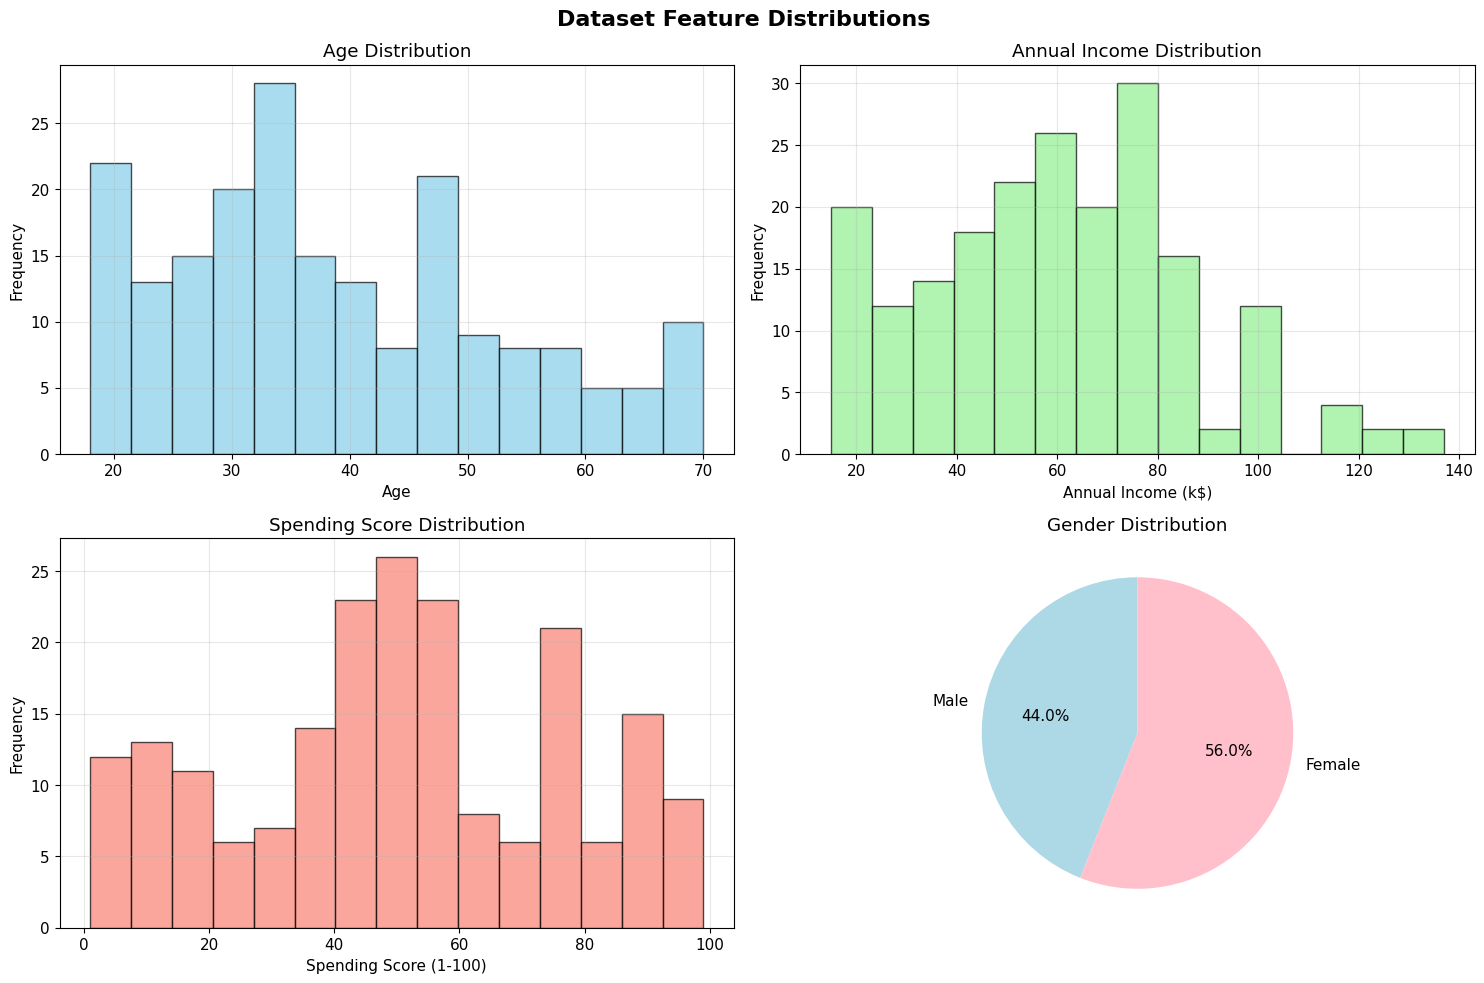

✅ Distribution plots!


In [30]:
# ============================================================================
# VISUAL EXPLORATION - DISTRIBUTIONS
# ============================================================================

print("\n" + "="*50)
print("STEP 4: VISUAL EXPLORATION - DISTRIBUTIONS")
print("="*50)

# Create distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Dataset Feature Distributions', fontsize=16, fontweight='bold')

# Age distribution
axes[0,0].hist(df_clean['Age'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Income distribution
axes[0,1].hist(df_clean['Annual Income (k$)'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Annual Income Distribution')
axes[0,1].set_xlabel('Annual Income (k$)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Spending Score distribution
axes[1,0].hist(df_clean['Spending Score (1-100)'], bins=15, color='salmon', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Spending Score Distribution')
axes[1,0].set_xlabel('Spending Score (1-100)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# Gender distribution
gender_counts = df_clean['Gender'].value_counts()
gender_labels = ['Male', 'Female']
axes[1,1].pie([len(df_clean) - df_clean['Gender'].sum(), df_clean['Gender'].sum()],
              labels=gender_labels, autopct='%1.1f%%',
              colors=['lightblue', 'pink'], startangle=90)
axes[1,1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

print("✅ Distribution plots!")


STEP 5: VISUAL EXPLORATION - RELATIONSHIPS


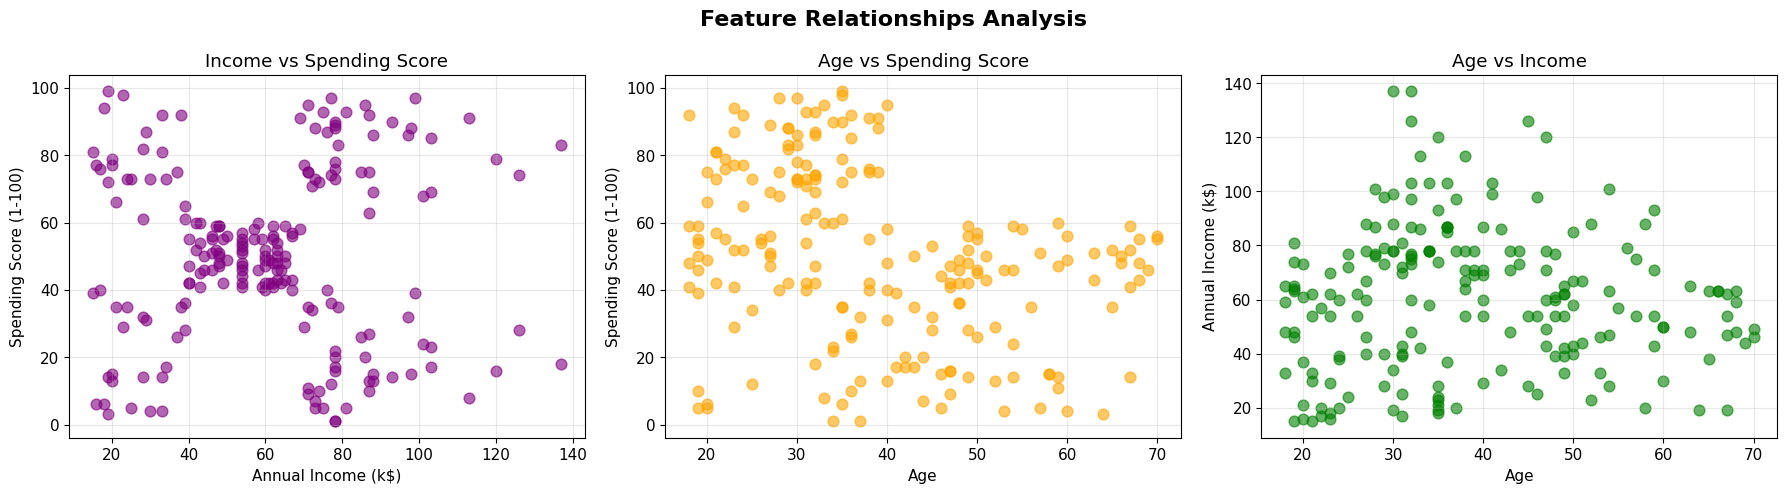

✅ Relationship plots!


In [31]:
# ============================================================================
# VISUAL EXPLORATION - RELATIONSHIPS
# ============================================================================

print("\n" + "="*50)
print("STEP 5: VISUAL EXPLORATION - RELATIONSHIPS")
print("="*50)

# Key relationship plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Feature Relationships Analysis', fontsize=16, fontweight='bold')

# Income vs Spending Score (main clustering features)
axes[0].scatter(df_clean['Annual Income (k$)'], df_clean['Spending Score (1-100)'],
               c='purple', alpha=0.6, s=60)
axes[0].set_title('Income vs Spending Score')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].grid(True, alpha=0.3)

# Age vs Spending Score
axes[1].scatter(df_clean['Age'], df_clean['Spending Score (1-100)'],
               c='orange', alpha=0.6, s=60)
axes[1].set_title('Age vs Spending Score')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].grid(True, alpha=0.3)

# Age vs Income
axes[2].scatter(df_clean['Age'], df_clean['Annual Income (k$)'],
               c='green', alpha=0.6, s=60)
axes[2].set_title('Age vs Income')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Annual Income (k$)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Relationship plots!")


STEP 6: CORRELATION ANALYSIS
📊 Correlation Matrix:
                        Gender    Age  Annual Income (k$)  \
Gender                   1.000 -0.061              -0.056   
Age                     -0.061  1.000              -0.012   
Annual Income (k$)      -0.056 -0.012               1.000   
Spending Score (1-100)   0.058 -0.327               0.010   

                        Spending Score (1-100)  
Gender                                   0.058  
Age                                     -0.327  
Annual Income (k$)                       0.010  
Spending Score (1-100)                   1.000  


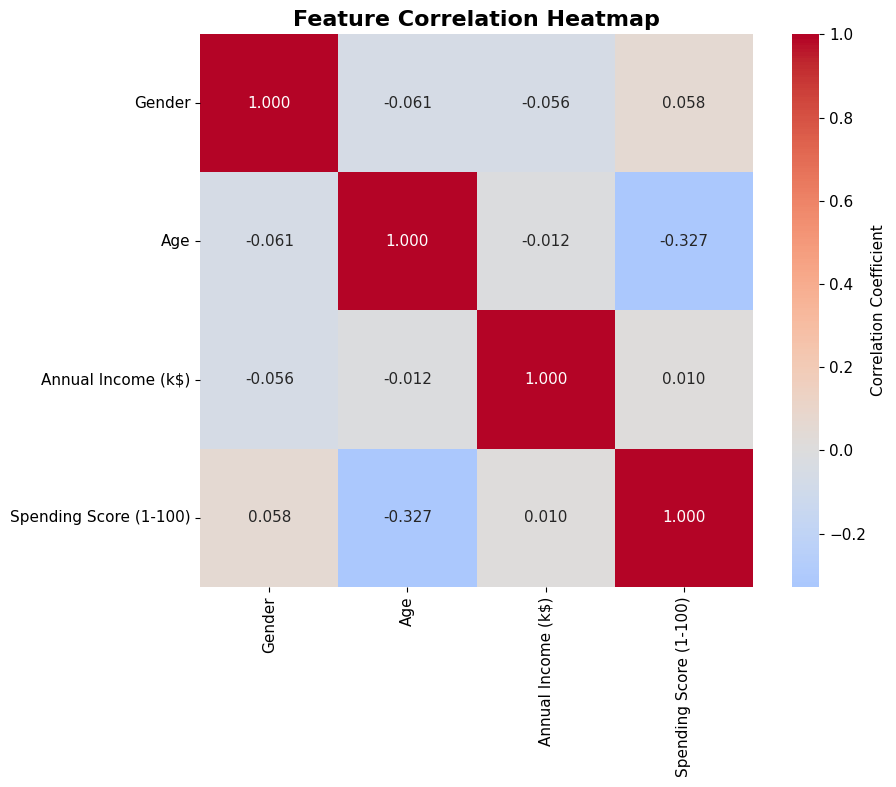

✅ Correlation analysis completed!


In [32]:
# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("STEP 6: CORRELATION ANALYSIS")
print("="*50)

# Calculate correlation matrix
correlation_matrix = df_clean.corr()
print("📊 Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Correlation analysis completed!")



STEP 7: FEATURE SCALING
📋 Features for scaling: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

📊 Original data statistics:
          Age  Annual Income (k$)  Spending Score (1-100)  Gender
count  200.00              200.00                  200.00  200.00
mean    38.85               60.56                   50.20    0.56
std     13.97               26.26                   25.82    0.50
min     18.00               15.00                    1.00    0.00
25%     28.75               41.50                   34.75    0.00
50%     36.00               61.50                   50.00    1.00
75%     49.00               78.00                   73.00    1.00
max     70.00              137.00                   99.00    1.00

✅ StandardScaler applied successfully!
📊 Scaled data statistics:
           Age  Annual Income (k$)  Spending Score (1-100)   Gender
count  200.000             200.000                 200.000  200.000
mean    -0.000              -0.000                  -0.000  

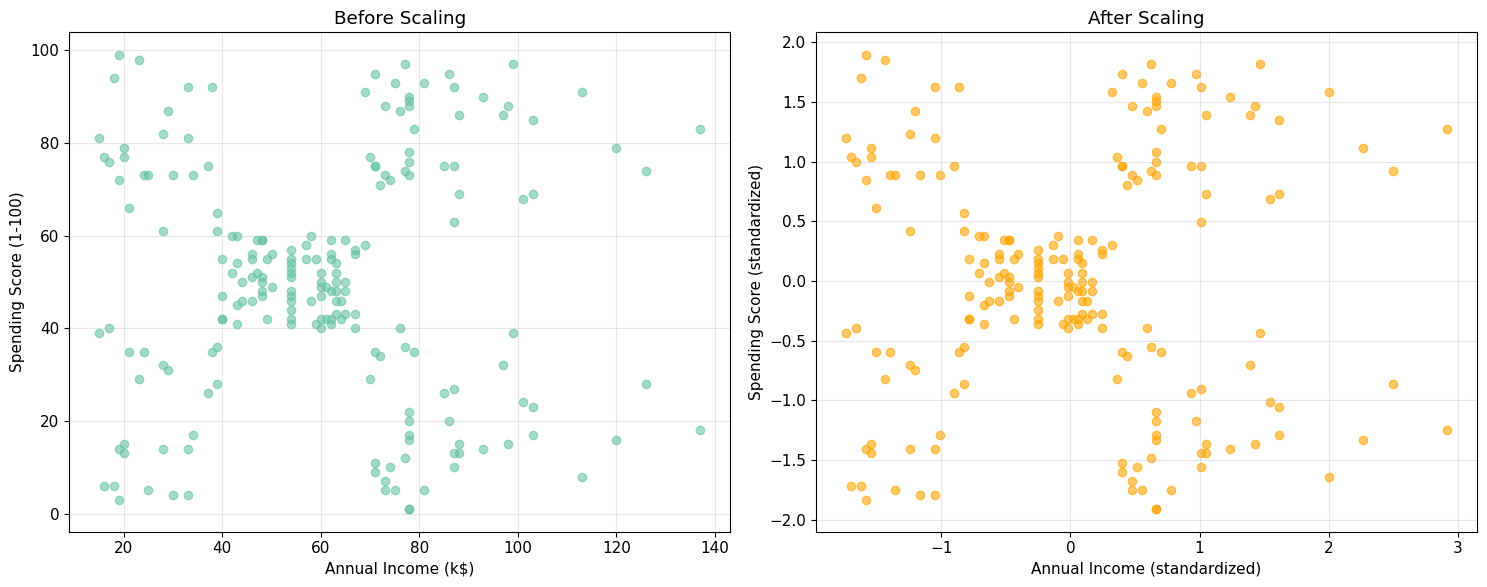

✅ Feature scaling visualization completed!


In [33]:
# ============================================================================
# FEATURE SCALING
# ============================================================================

print("\n" + "="*50)
print("STEP 7: FEATURE SCALING")
print("="*50)

# Select features for scaling
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = df_clean[features].copy()

print(f"📋 Features for scaling: {features}")
print(f"\n📊 Original data statistics:")
print(X.describe().round(2))

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(f"\n✅ StandardScaler applied successfully!")
print(f"📊 Scaled data statistics:")
print(X_scaled_df.describe().round(3))

# Visualize scaling effect
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before scaling
ax1.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.6)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.grid(True, alpha=0.3)

# After scaling
ax2.scatter(X_scaled_df['Annual Income (k$)'], X_scaled_df['Spending Score (1-100)'], alpha=0.6, color='orange')
ax2.set_title('After Scaling')
ax2.set_xlabel('Annual Income (standardized)')
ax2.set_ylabel('Spending Score (standardized)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Feature scaling visualization completed!")


STEP 8: OPTIMAL CLUSTERS - ELBOW METHOD
🔍 Testing different cluster numbers...


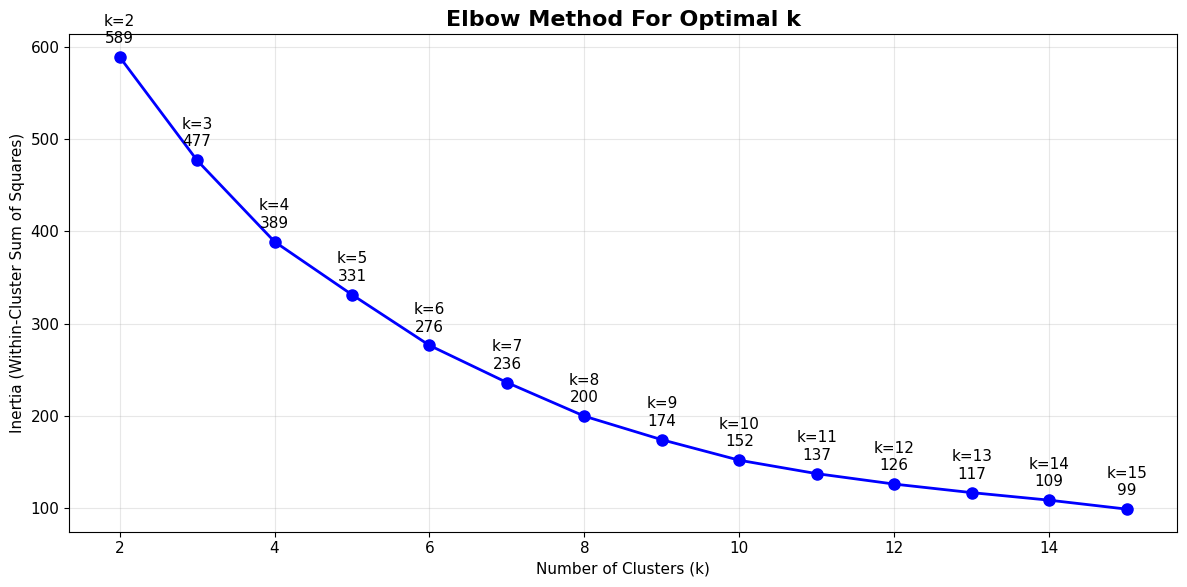

📊 Inertia values for different k:
     k     Inertia
0    2  588.802677
1    3  476.787554
2    4  388.717861
3    5  331.309884
4    6  276.411760
5    7  236.204947
6    8  199.750461
7    9  174.235477
8   10  152.029834
9   11  137.497372
10  12  126.201008
11  13  116.954406
12  14  108.785846
13  15   99.097260
✅ Elbow method analysis completed!


In [34]:
# ============================================================================
# OPTIMAL CLUSTERS - ELBOW METHOD
# ============================================================================

print("\n" + "="*50)
print("STEP 8: OPTIMAL CLUSTERS - ELBOW METHOD")
print("="*50)

# Calculate inertias for different k values
k_range = range(2, 16)
inertias = []

print("🔍 Testing different cluster numbers...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Create elbow plot
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method For Optimal k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True, alpha=0.3)

# Mark potential elbow points
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    plt.annotate(f'k={k}\n{inertia:.0f}', (k, inertia),
                textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Display inertia values
inertia_df = pd.DataFrame({'k': k_range, 'Inertia': inertias})
print("📊 Inertia values for different k:")
print(inertia_df)

print("✅ Elbow method analysis completed!")


STEP 9: OPTIMAL CLUSTERS - SILHOUETTE ANALYSIS
🔍 Calculating silhouette scores...


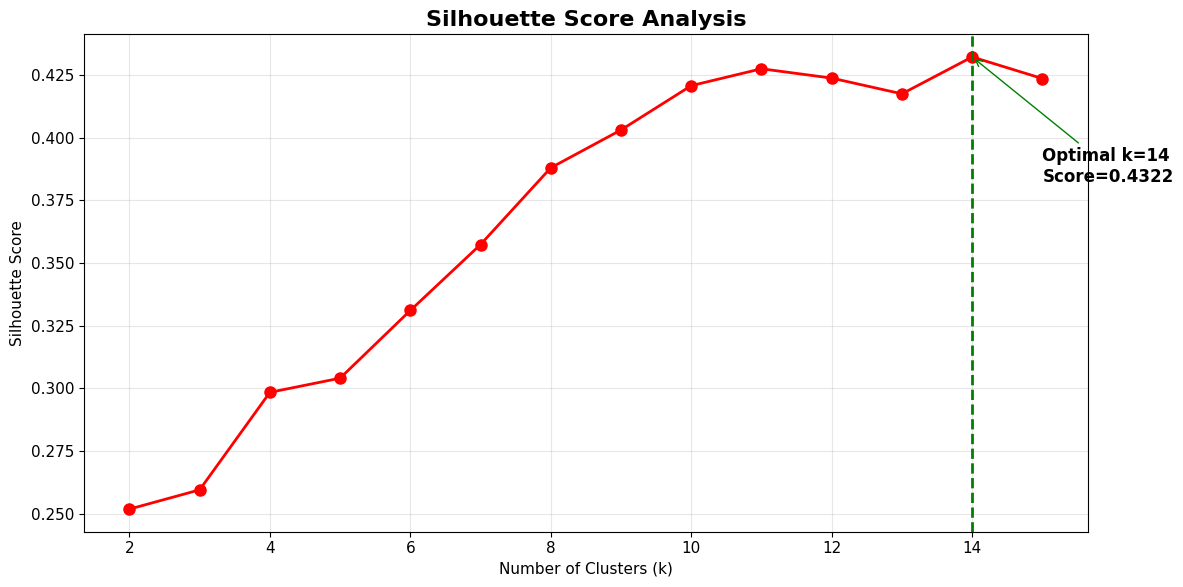

📊 Silhouette scores for different k:
     k  Silhouette_Score
0    2          0.251815
1    3          0.259513
2    4          0.298397
3    5          0.304060
4    6          0.331074
5    7          0.357377
6    8          0.387993
7    9          0.403092
8   10          0.420764
9   11          0.427507
10  12          0.423777
11  13          0.417502
12  14          0.432221
13  15          0.423599
🎯 OPTIMAL NUMBER OF CLUSTERS: 14
🏆 BEST SILHOUETTE SCORE: 0.4322
✅ Silhouette analysis completed!


In [35]:
# ============================================================================
# OPTIMAL CLUSTERS - SILHOUETTE ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("STEP 9: OPTIMAL CLUSTERS - SILHOUETTE ANALYSIS")
print("="*50)

# Calculate silhouette scores
silhouette_scores = []

print("🔍 Calculating silhouette scores...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create silhouette plot
plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Score Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

# Mark optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=optimal_k, color='green', linestyle='--', linewidth=2)
plt.annotate(f'Optimal k={optimal_k}\nScore={best_score:.4f}',
            xy=(optimal_k, best_score), xytext=(optimal_k+1, best_score-0.05),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Display silhouette scores
silhouette_df = pd.DataFrame({'k': k_range, 'Silhouette_Score': silhouette_scores})
print("📊 Silhouette scores for different k:")
print(silhouette_df)

print(f"🎯 OPTIMAL NUMBER OF CLUSTERS: {optimal_k}")
print(f"🏆 BEST SILHOUETTE SCORE: {best_score:.4f}")

print("✅ Silhouette analysis completed!")

In [36]:
# ============================================================================
# K-MEANS CLUSTERING
# ============================================================================

print("\n" + "="*50)
print("STEP 10: K-MEANS CLUSTERING")
print("="*50)

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clustered = df_clean.copy()
df_clustered['Cluster'] = cluster_labels

# Calculate final metrics
final_silhouette = silhouette_score(X_scaled, cluster_labels)
final_inertia = kmeans.inertia_

print(f"✅ K-Means clustering completed with k={optimal_k}!")
print(f"🎯 Final Silhouette Score: {final_silhouette:.4f}")
print(f"📊 Final Inertia: {final_inertia:.2f}")

# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\n📈 Cluster Distribution:")
print("Cluster | Count | Percentage")
print("-" * 30)
for i, count in enumerate(cluster_counts):
    percentage = (count / len(df_clustered)) * 100
    print(f"   {i}    |  {count:3d}  |   {percentage:5.1f}%")

print(f"\n🔍 Sample of clustered data:")
print(df_clustered.head(10))

print("✅ K-Means clustering results generated!")


STEP 10: K-MEANS CLUSTERING
✅ K-Means clustering completed with k=14!
🎯 Final Silhouette Score: 0.4322
📊 Final Inertia: 108.79

📈 Cluster Distribution:
Cluster | Count | Percentage
------------------------------
   0    |   11  |     5.5%
   1    |   14  |     7.0%
   2    |   13  |     6.5%
   3    |   18  |     9.0%
   4    |    9  |     4.5%
   5    |   26  |    13.0%
   6    |   21  |    10.5%
   7    |   10  |     5.0%
   8    |   18  |     9.0%
   9    |    9  |     4.5%
   10    |    8  |     4.0%
   11    |   24  |    12.0%
   12    |   14  |     7.0%
   13    |    5  |     2.5%

🔍 Sample of clustered data:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        4
1       0   21                  15                      81       10
2       1   20                  16                       6        2
3       1   23                  16                      77        1
4       1   31                  17  


STEP 11: CLUSTER VISUALIZATION - MAIN PLOT


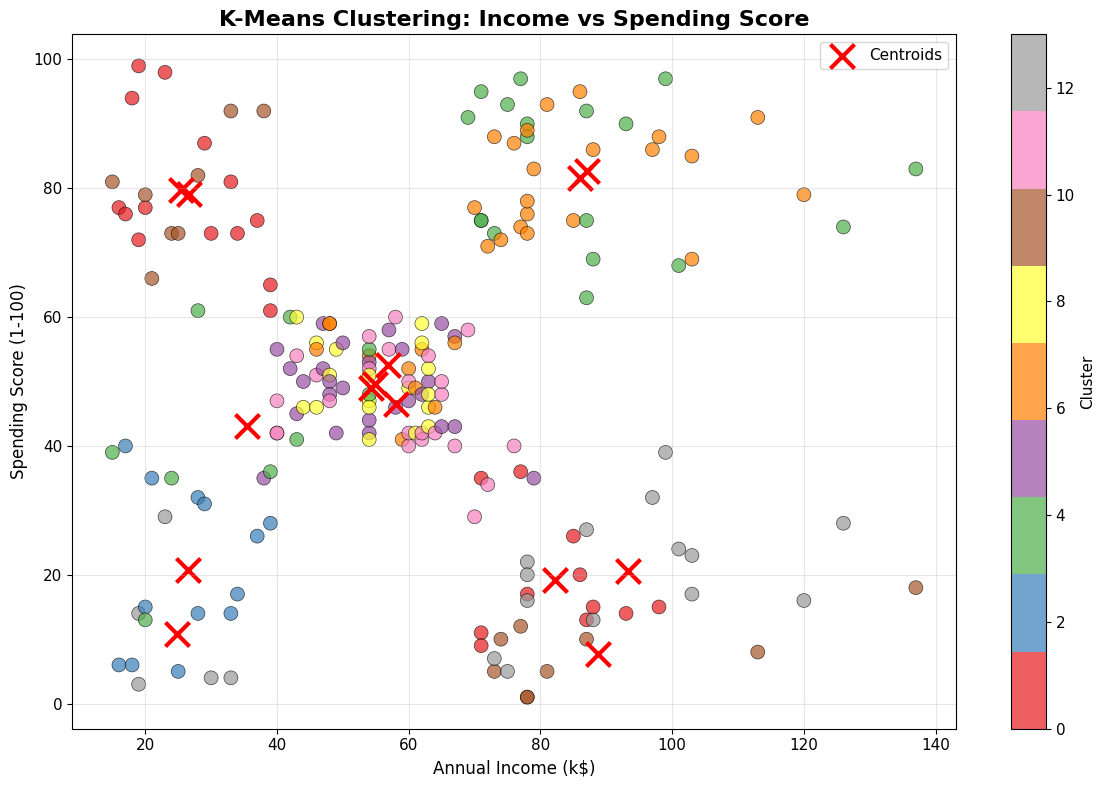

✅ Main cluster visualization completed!


In [37]:
# ============================================================================
# CLUSTER VISUALIZATION - MAIN PLOT
# ============================================================================

print("\n" + "="*50)
print("STEP 11: CLUSTER VISUALIZATION - MAIN PLOT")
print("="*50)

# Main clustering visualization: Income vs Spending Score
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clustered['Annual Income (k$)'],
                     df_clustered['Spending Score (1-100)'],
                     c=df_clustered['Cluster'],
                     cmap='Set1',
                     s=100,
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

plt.title('K-Means Clustering: Income vs Spending Score', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# Add cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 1], centers[:, 2],
           marker='x', s=300, linewidths=3, color='red', label='Centroids')

plt.legend()
plt.tight_layout()
plt.show()

print("✅ Main cluster visualization completed!")


STEP 12: CLUSTER VISUALIZATION - MULTIPLE PERSPECTIVES


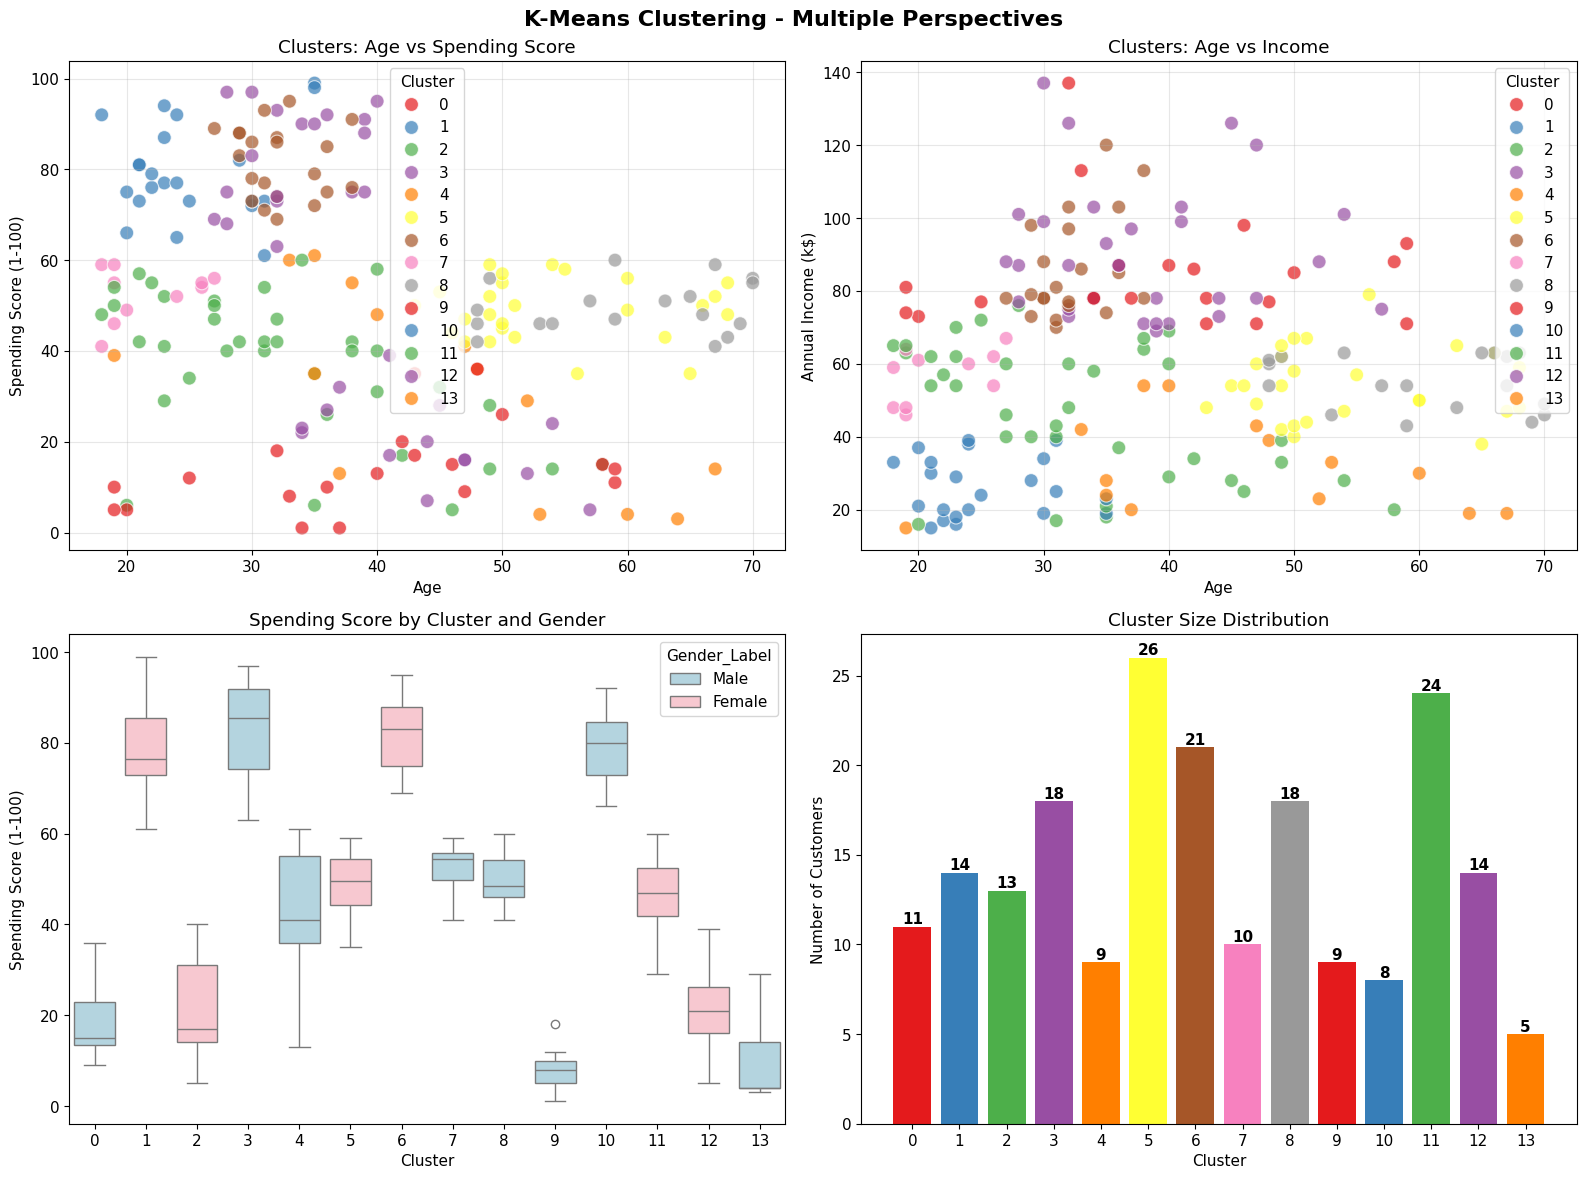

✅ Multiple perspective visualizations completed!


In [38]:
# ============================================================================
# CLUSTER VISUALIZATION - MULTIPLE PERSPECTIVES
# ============================================================================

print("\n" + "="*50)
print("STEP 12: CLUSTER VISUALIZATION - MULTIPLE PERSPECTIVES")
print("="*50)

# Multiple perspective plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('K-Means Clustering - Multiple Perspectives', fontsize=16, fontweight='bold')

# 1. Age vs Spending Score
sns.scatterplot(data=df_clustered, x='Age', y='Spending Score (1-100)',
               hue='Cluster', palette='Set1', s=100, alpha=0.7, ax=axes[0,0])
axes[0,0].set_title('Clusters: Age vs Spending Score')
axes[0,0].grid(True, alpha=0.3)

# 2. Age vs Income
sns.scatterplot(data=df_clustered, x='Age', y='Annual Income (k$)',
               hue='Cluster', palette='Set1', s=100, alpha=0.7, ax=axes[0,1])
axes[0,1].set_title('Clusters: Age vs Income')
axes[0,1].grid(True, alpha=0.3)

# 3. Gender vs Spending by Cluster
df_clustered['Gender_Label'] = df_clustered['Gender'].map({0: 'Male', 1: 'Female'})
sns.boxplot(data=df_clustered, x='Cluster', y='Spending Score (1-100)',
           hue='Gender_Label', palette=['lightblue', 'pink'], ax=axes[1,0])
axes[1,0].set_title('Spending Score by Cluster and Gender')

# 4. Cluster size distribution
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
bars = axes[1,1].bar(range(len(cluster_counts)), cluster_counts.values,
                    color=sns.color_palette('Set1', len(cluster_counts)))
axes[1,1].set_title('Cluster Size Distribution')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xticks(range(len(cluster_counts)))

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Multiple perspective visualizations completed!")

In [39]:
# ============================================================================
# CLUSTER STATISTICAL ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("STEP 13: CLUSTER STATISTICAL ANALYSIS")
print("="*50)

# Calculate comprehensive cluster statistics
cluster_stats = df_clustered.groupby('Cluster').agg({
    'Age': ['count', 'mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'Gender': ['mean']  # Proportion of females
}).round(2)

print("📊 COMPREHENSIVE CLUSTER STATISTICS:")
print("="*80)
print(cluster_stats)

# Create a cleaner summary table
summary_stats = []
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]

    stats = {
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Size_Pct': round((len(cluster_data)/len(df_clustered))*100, 1),
        'Avg_Age': round(cluster_data['Age'].mean(), 1),
        'Avg_Income': round(cluster_data['Annual Income (k$)'].mean(), 1),
        'Avg_Spending': round(cluster_data['Spending Score (1-100)'].mean(), 1),
        'Female_Pct': round(cluster_data['Gender'].mean()*100, 1)
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print(f"\n📋 CLUSTER SUMMARY TABLE:")
print("="*80)
print(summary_df.to_string(index=False))

print("✅ Cluster statistical analysis completed!")


STEP 13: CLUSTER STATISTICAL ANALYSIS
📊 COMPREHENSIVE CLUSTER STATISTICS:
          Age                       Annual Income (k$)                  \
        count   mean    std min max               mean    std min  max   
Cluster                                                                  
0          11  48.64   7.05  40  59              82.27   9.31  71   98   
1          14  25.86   5.23  20  35              26.64   8.68  16   39   
2          13  41.54  10.26  20  58              26.54   7.76  16   39   
3          18  33.28   4.39  27  40              87.11  18.93  69  137   
4           9  36.89   8.51  19  48              35.44  14.34  15   54   
5          26  54.15   7.82  43  68              54.23   9.96  38   79   
6          21  32.19   3.08  27  38              86.05  14.16  70  120   
7          10  21.60   3.69  18  27              56.90   7.42  46   67   
8          18  60.00   8.27  48  70              54.94   7.40  43   63   
9           9  28.33   7.55  19  37  

In [40]:
# ============================================================================
# CLUSTER PROFILING AND BUSINESS INSIGHTS
# ============================================================================

print("\n" + "="*50)
print("STEP 14: CLUSTER PROFILING AND BUSINESS INSIGHTS")
print("="*50)

print("🏢 DETAILED CLUSTER PROFILES:")
print("="*80)

for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    size = len(cluster_data)

    # Calculate key metrics
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    female_ratio = cluster_data['Gender'].mean()

    print(f"\n🔹 CLUSTER {cluster_id} ({size} customers, {size/len(df_clustered)*100:.1f}%)")
    print(f"   ├─ Demographics: {avg_age:.1f} years avg age, {female_ratio*100:.1f}% female")
    print(f"   ├─ Financial: ${avg_income:.1f}k average income")
    print(f"   ├─ Behavior: {avg_spending:.1f}/100 spending score")

    # Business classification
    if avg_income >= 70 and avg_spending >= 70:
        profile = "💎 HIGH VALUE CUSTOMERS"
        description = "High income, high spending - Premium customers"
        strategy = "VIP treatment, luxury products, exclusive offers"

    elif avg_income >= 70 and avg_spending <= 40:
        profile = "🎯 POTENTIAL CUSTOMERS"
        description = "High income, low spending - Untapped potential"
        strategy = "Targeted marketing, promotional offers, product demos"

    elif avg_income <= 40 and avg_spending >= 70:
        profile = "⚡ CAREFUL SPENDERS"
        description = "Low income, high spending - Budget-conscious but loyal"
        strategy = "Value products, payment plans, loyalty rewards"

    elif avg_income <= 40 and avg_spending <= 40:
        profile = "💰 BUDGET CONSCIOUS"
        description = "Low income, low spending - Price-sensitive customers"
        strategy = "Discount offers, basic products, cost-effective solutions"

    else:
        profile = "⚖️ MODERATE CUSTOMERS"
        description = "Balanced income and spending patterns"
        strategy = "Standard offerings, regular promotions, mid-range products"

    print(f"   ├─ Profile: {profile}")
    print(f"   ├─ Description: {description}")
    print(f"   └─ Strategy: {strategy}")

print("\n✅ Cluster profiling and business insights completed!")


STEP 14: CLUSTER PROFILING AND BUSINESS INSIGHTS
🏢 DETAILED CLUSTER PROFILES:

🔹 CLUSTER 0 (11 customers, 5.5%)
   ├─ Demographics: 48.6 years avg age, 0.0% female
   ├─ Financial: $82.3k average income
   ├─ Behavior: 19.2/100 spending score
   ├─ Profile: 🎯 POTENTIAL CUSTOMERS
   ├─ Description: High income, low spending - Untapped potential
   └─ Strategy: Targeted marketing, promotional offers, product demos

🔹 CLUSTER 1 (14 customers, 7.0%)
   ├─ Demographics: 25.9 years avg age, 100.0% female
   ├─ Financial: $26.6k average income
   ├─ Behavior: 79.1/100 spending score
   ├─ Profile: ⚡ CAREFUL SPENDERS
   ├─ Description: Low income, high spending - Budget-conscious but loyal
   └─ Strategy: Value products, payment plans, loyalty rewards

🔹 CLUSTER 2 (13 customers, 6.5%)
   ├─ Demographics: 41.5 years avg age, 100.0% female
   ├─ Financial: $26.5k average income
   ├─ Behavior: 20.7/100 spending score
   ├─ Profile: 💰 BUDGET CONSCIOUS
   ├─ Description: Low income, low spending 


STEP 15: AVERAGE SPENDING ANALYSIS (BONUS)
📊 SPENDING STATISTICS BY CLUSTER:
         Count   Mean  Median    Std  Min  Max
Cluster                                       
0           11  19.18    15.0   9.25    9   36
1           14  79.14    76.5  11.53   61   99
2           13  20.69    17.0  11.93    5   40
3           18  82.67    85.5  11.10   63   97
4            9  43.11    41.0  15.06   13   61
5           26  48.96    49.5   6.70   35   59
6           21  81.67    83.0   7.83   69   95
7           10  52.60    54.5   5.76   41   59
8           18  49.67    48.5   5.71   41   60
9            9   7.78     8.0   5.47    1   18
10           8  79.75    80.0   9.16   66   92
11          24  46.54    47.0   7.82   29   60
12          14  20.64    21.0   9.30    5   39
13           5  10.80     4.0  11.12    3   29


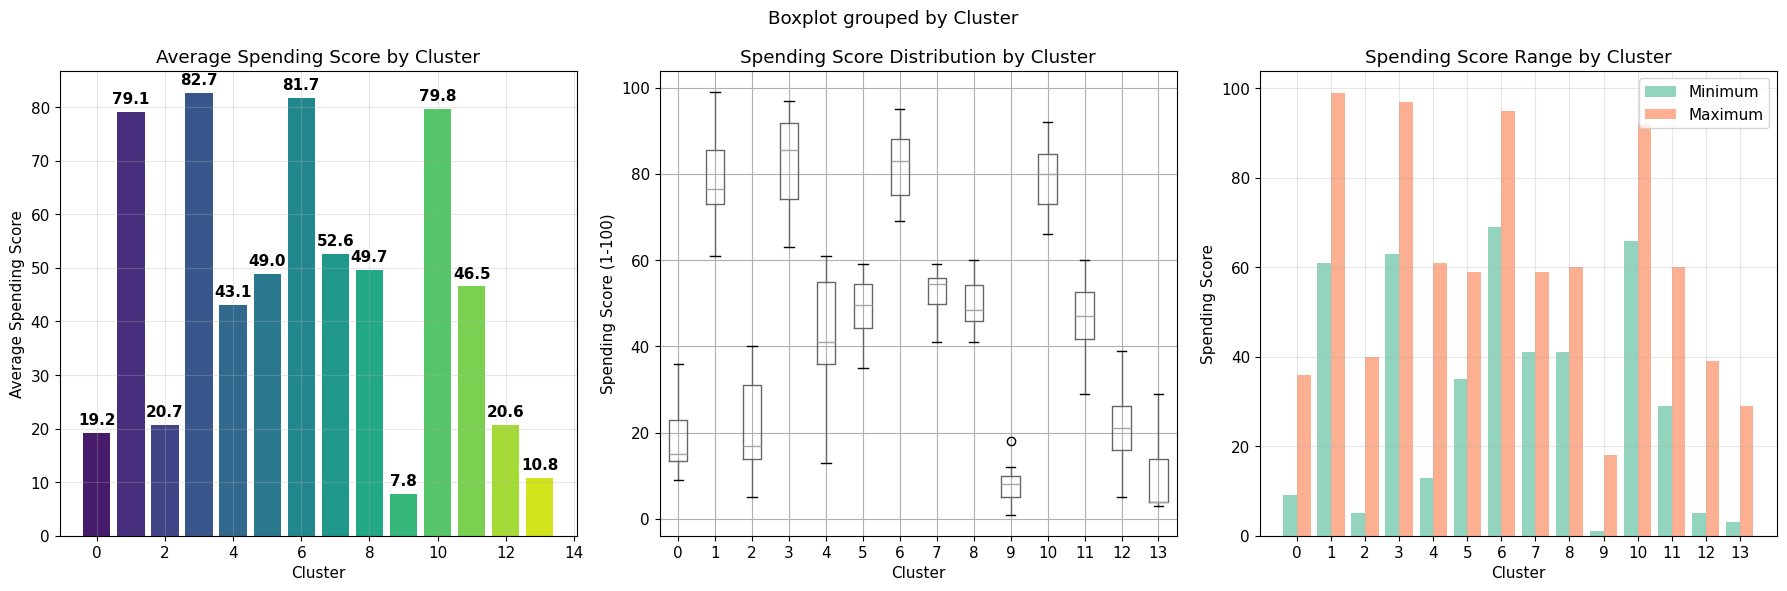


🎯 KEY SPENDING INSIGHTS:
   🔴 Highest Spenders: Cluster 3 (Avg: 82.7/100)
   🔵 Lowest Spenders: Cluster 9 (Avg: 7.8/100)
   📊 Spending Range: 74.9 points difference
   💡 Most Consistent: Cluster 9 (Std: 5.5)
   🎲 Most Varied: Cluster 4 (Std: 15.1)

✅ Average spending analysis (BONUS) completed!


In [41]:
# ============================================================================
# AVERAGE SPENDING ANALYSIS (BONUS)
# ============================================================================

print("\n" + "="*50)
print("STEP 15: AVERAGE SPENDING ANALYSIS (BONUS)")
print("="*50)

# Detailed spending analysis
spending_analysis = df_clustered.groupby('Cluster')['Spending Score (1-100)'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

spending_analysis.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max']

print("📊 SPENDING STATISTICS BY CLUSTER:")
print("="*60)
print(spending_analysis)

# Visualization of spending analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Average Spending Analysis by Cluster (BONUS)', fontsize=16, fontweight='bold')

# 1. Average spending by cluster
clusters = spending_analysis.index
mean_spending = spending_analysis['Mean']
bars = ax1.bar(clusters, mean_spending, color=sns.color_palette('viridis', len(clusters)))
ax1.set_title('Average Spending Score by Cluster')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Spending Score')
ax1.grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Spending distribution by cluster (boxplot)
df_clustered.boxplot(column='Spending Score (1-100)', by='Cluster', ax=ax2)
ax2.set_title('Spending Score Distribution by Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Spending Score (1-100)')

# 3. Spending range comparison
x_pos = np.arange(len(clusters))
ax3.bar(x_pos - 0.2, spending_analysis['Min'], 0.4, label='Minimum', alpha=0.7)
ax3.bar(x_pos + 0.2, spending_analysis['Max'], 0.4, label='Maximum', alpha=0.7)
ax3.set_title('Spending Score Range by Cluster')
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Spending Score')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(clusters)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key spending insights
highest_spenders = spending_analysis['Mean'].idxmax()
lowest_spenders = spending_analysis['Mean'].idxmin()
spending_range = spending_analysis['Mean'].max() - spending_analysis['Mean'].min()

print(f"\n🎯 KEY SPENDING INSIGHTS:")
print(f"   🔴 Highest Spenders: Cluster {highest_spenders} (Avg: {spending_analysis.loc[highest_spenders, 'Mean']:.1f}/100)")
print(f"   🔵 Lowest Spenders: Cluster {lowest_spenders} (Avg: {spending_analysis.loc[lowest_spenders, 'Mean']:.1f}/100)")
print(f"   📊 Spending Range: {spending_range:.1f} points difference")
print(f"   💡 Most Consistent: Cluster {spending_analysis['Std'].idxmin()} (Std: {spending_analysis['Std'].min():.1f})")
print(f"   🎲 Most Varied: Cluster {spending_analysis['Std'].idxmax()} (Std: {spending_analysis['Std'].max():.1f})")

print("\n✅ Average spending analysis (BONUS) completed!")

In [42]:
# ============================================================================
# DBSCAN PARAMETER TESTING (BONUS)
# ============================================================================

print("\n" + "="*50)
print("STEP 16: DBSCAN PARAMETER TESTING (BONUS)")
print("="*50)

# Test different DBSCAN parameters
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
min_samples_values = [3, 4, 5, 6]

print("🔍 Testing DBSCAN parameters...")

dbscan_results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_pct = (n_noise / len(labels)) * 100

        result = {
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_pct': round(noise_pct, 1)
        }

        # Calculate silhouette score if valid clustering
        if n_clusters > 1 and n_noise < len(labels):
            non_noise_mask = labels != -1
            if non_noise_mask.sum() > 1:
                sil_score = silhouette_score(X_scaled[non_noise_mask], labels[non_noise_mask])
                result['silhouette'] = round(sil_score, 4)

        dbscan_results.append(result)

# Convert to DataFrame for better display
dbscan_df = pd.DataFrame(dbscan_results)
print("📊 DBSCAN Parameter Testing Results:")
print("="*70)
print(dbscan_df.to_string(index=False))

# Find best parameters
valid_results = dbscan_df.dropna(subset=['silhouette'])
if not valid_results.empty:
    best_result = valid_results.loc[valid_results['silhouette'].idxmax()]
    best_eps = float(best_result['eps'])  # Ensure it's a Python float
    best_min_samples = int(best_result['min_samples'])  # Ensure it's a Python int
    best_silhouette = best_result['silhouette']

    print(f"\n🏆 BEST DBSCAN PARAMETERS:")
    print(f"   ├─ eps: {best_eps}")
    print(f"   ├─ min_samples: {best_min_samples}")
    print(f"   ├─ silhouette score: {best_silhouette}")
    print(f"   ├─ clusters: {best_result['n_clusters']}")
    print(f"   └─ noise: {best_result['noise_pct']}%")
else:
    # Use default parameters
    best_eps = 0.5
    best_min_samples = 5
    print("⚠️ Using default parameters: eps=0.5, min_samples=5")

print("✅ DBSCAN parameter testing completed!")


STEP 16: DBSCAN PARAMETER TESTING (BONUS)
🔍 Testing DBSCAN parameters...
📊 DBSCAN Parameter Testing Results:
 eps  min_samples  n_clusters  n_noise  noise_pct  silhouette
 0.3            3          14      144       72.0      0.6293
 0.3            4           4      177       88.5      0.6818
 0.3            5           1      194       97.0         NaN
 0.3            6           0      200      100.0         NaN
 0.4            3          18       97       48.5      0.5501
 0.4            4           8      133       66.5      0.6372
 0.4            5           4      165       82.5      0.7116
 0.4            6           2      177       88.5      0.7465
 0.5            3          18       49       24.5      0.4746
 0.5            4          12       76       38.0      0.5569
 0.5            5           9      105       52.5      0.5395
 0.5            6           5      135       67.5      0.6299
 0.6            3          13       26       13.0      0.3265
 0.6            4     

In [43]:
# ============================================================================
# DBSCAN CLUSTERING (BONUS)
# ============================================================================

print("\n" + "="*50)
print("STEP 17: DBSCAN CLUSTERING (BONUS)")
print("="*50)

# Apply DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Create DBSCAN clustered dataframe
df_dbscan = df_clean.copy()
df_dbscan['Cluster'] = dbscan_labels

# DBSCAN results analysis
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
n_core_samples = len(dbscan.core_sample_indices_)

print(f"🎯 DBSCAN CLUSTERING RESULTS:")
print(f"   ├─ Parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"   ├─ Number of clusters: {n_clusters_dbscan}")
print(f"   ├─ Core samples: {n_core_samples}")
print(f"   ├─ Noise points: {n_noise}")
print(f"   └─ Noise percentage: {(n_noise/len(df_dbscan))*100:.1f}%")

# Calculate silhouette score for DBSCAN (excluding noise)
if n_clusters_dbscan > 1 and n_noise < len(df_dbscan):
    non_noise_mask = dbscan_labels != -1
    if non_noise_mask.sum() > 1:
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
        print(f"   └─ Silhouette Score: {dbscan_silhouette:.4f}")

# DBSCAN cluster distribution
print(f"\n📈 DBSCAN Cluster Distribution:")
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
print("Cluster | Count | Percentage")
print("-" * 30)
for cluster_id, count in dbscan_counts.items():
    percentage = (count / len(df_dbscan)) * 100
    cluster_name = "Noise" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"  {cluster_name:7} | {count:3d}  |   {percentage:5.1f}%")

print("✅ DBSCAN clustering completed!")


STEP 17: DBSCAN CLUSTERING (BONUS)
🎯 DBSCAN CLUSTERING RESULTS:
   ├─ Parameters: eps=0.4, min_samples=6
   ├─ Number of clusters: 2
   ├─ Core samples: 13
   ├─ Noise points: 177
   └─ Noise percentage: 88.5%
   └─ Silhouette Score: 0.7465

📈 DBSCAN Cluster Distribution:
Cluster | Count | Percentage
------------------------------
  Noise   | 177  |    88.5%
  Cluster 0 |   9  |     4.5%
  Cluster 1 |  14  |     7.0%
✅ DBSCAN clustering completed!



STEP 18: DBSCAN VISUALIZATION


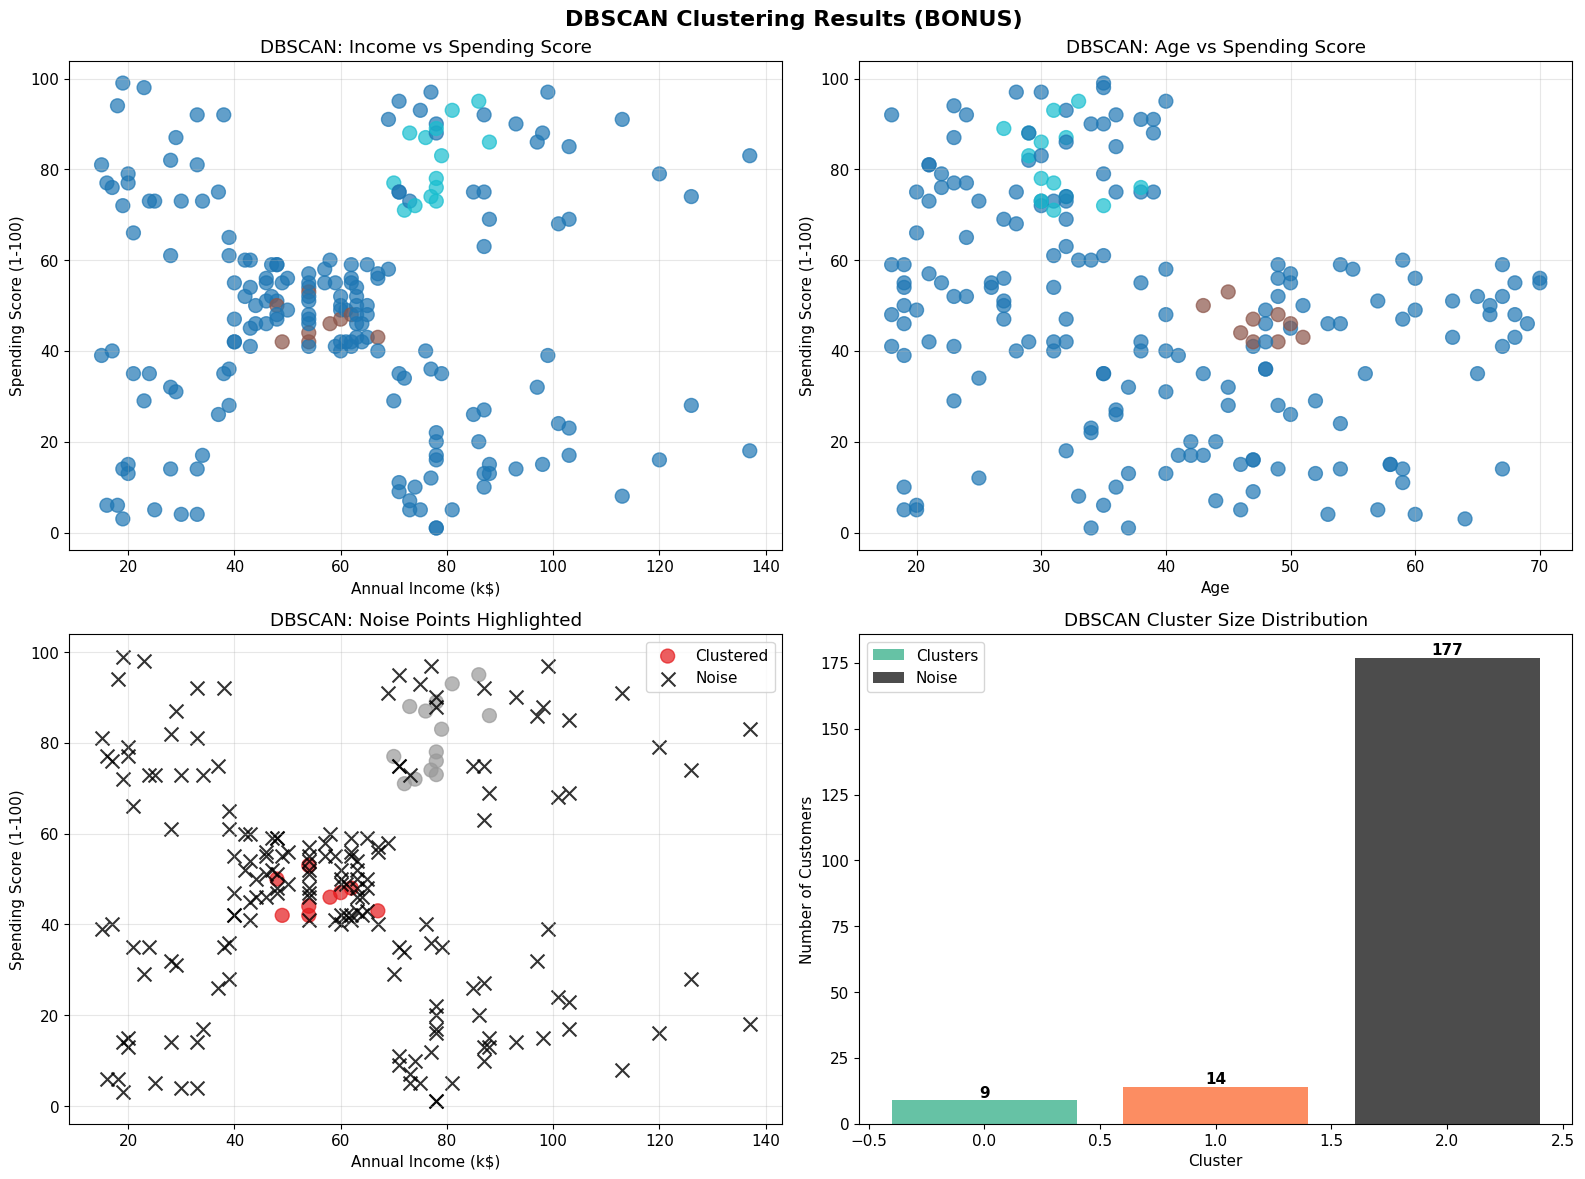

✅ DBSCAN visualization completed!


In [44]:
# ============================================================================
# DBSCAN VISUALIZATION
# ============================================================================

print("\n" + "="*50)
print("STEP 18: DBSCAN VISUALIZATION")
print("="*50)

# DBSCAN visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DBSCAN Clustering Results (BONUS)', fontsize=16, fontweight='bold')

# 1. Income vs Spending Score with DBSCAN clusters
scatter1 = axes[0,0].scatter(df_dbscan['Annual Income (k$)'],
                            df_dbscan['Spending Score (1-100)'],
                            c=df_dbscan['Cluster'],
                            cmap='tab10',
                            s=100,
                            alpha=0.7)
axes[0,0].set_title('DBSCAN: Income vs Spending Score')
axes[0,0].set_xlabel('Annual Income (k$)')
axes[0,0].set_ylabel('Spending Score (1-100)')
axes[0,0].grid(True, alpha=0.3)

# 2. Age vs Spending Score
scatter2 = axes[0,1].scatter(df_dbscan['Age'],
                            df_dbscan['Spending Score (1-100)'],
                            c=df_dbscan['Cluster'],
                            cmap='tab10',
                            s=100,
                            alpha=0.7)
axes[0,1].set_title('DBSCAN: Age vs Spending Score')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Spending Score (1-100)')
axes[0,1].grid(True, alpha=0.3)

# 3. Highlight noise points
noise_points = df_dbscan[df_dbscan['Cluster'] == -1]
regular_points = df_dbscan[df_dbscan['Cluster'] != -1]

axes[1,0].scatter(regular_points['Annual Income (k$)'],
                 regular_points['Spending Score (1-100)'],
                 c=regular_points['Cluster'], cmap='Set1',
                 s=100, alpha=0.7, label='Clustered')

if len(noise_points) > 0:
    axes[1,0].scatter(noise_points['Annual Income (k$)'],
                     noise_points['Spending Score (1-100)'],
                     c='black', marker='x', s=100, alpha=0.8, label='Noise')

axes[1,0].set_title('DBSCAN: Noise Points Highlighted')
axes[1,0].set_xlabel('Annual Income (k$)')
axes[1,0].set_ylabel('Spending Score (1-100)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. DBSCAN cluster size distribution
dbscan_counts_plot = dbscan_counts[dbscan_counts.index != -1]  # Exclude noise for bar plot
noise_count = dbscan_counts.get(-1, 0)

bars = axes[1,1].bar(range(len(dbscan_counts_plot)), dbscan_counts_plot.values,
                    color=sns.color_palette('Set2', len(dbscan_counts_plot)),
                    label='Clusters')

if noise_count > 0:
    axes[1,1].bar(len(dbscan_counts_plot), noise_count,
                 color='black', alpha=0.7, label='Noise')

axes[1,1].set_title('DBSCAN Cluster Size Distribution')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].legend()

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{int(height)}', ha='center', va='bottom', fontweight='bold')

if noise_count > 0:
    axes[1,1].text(len(dbscan_counts_plot), noise_count,
                  f'{noise_count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ DBSCAN visualization completed!")


STEP 19: K-MEANS vs DBSCAN COMPARISON
📊 CLUSTERING ALGORITHMS COMPARISON:
               Metric            K-Means                  DBSCAN
            Algorithm     Centroid-based           Density-based
   Number of Clusters 14 (predetermined)           2 (automatic)
     Silhouette Score             0.4322                  0.7465
        Handles Noise                 No                     Yes
        Cluster Shape          Spherical               Arbitrary
Parameter Sensitivity       Low (only k) High (eps, min_samples)
          Scalability               High                  Medium


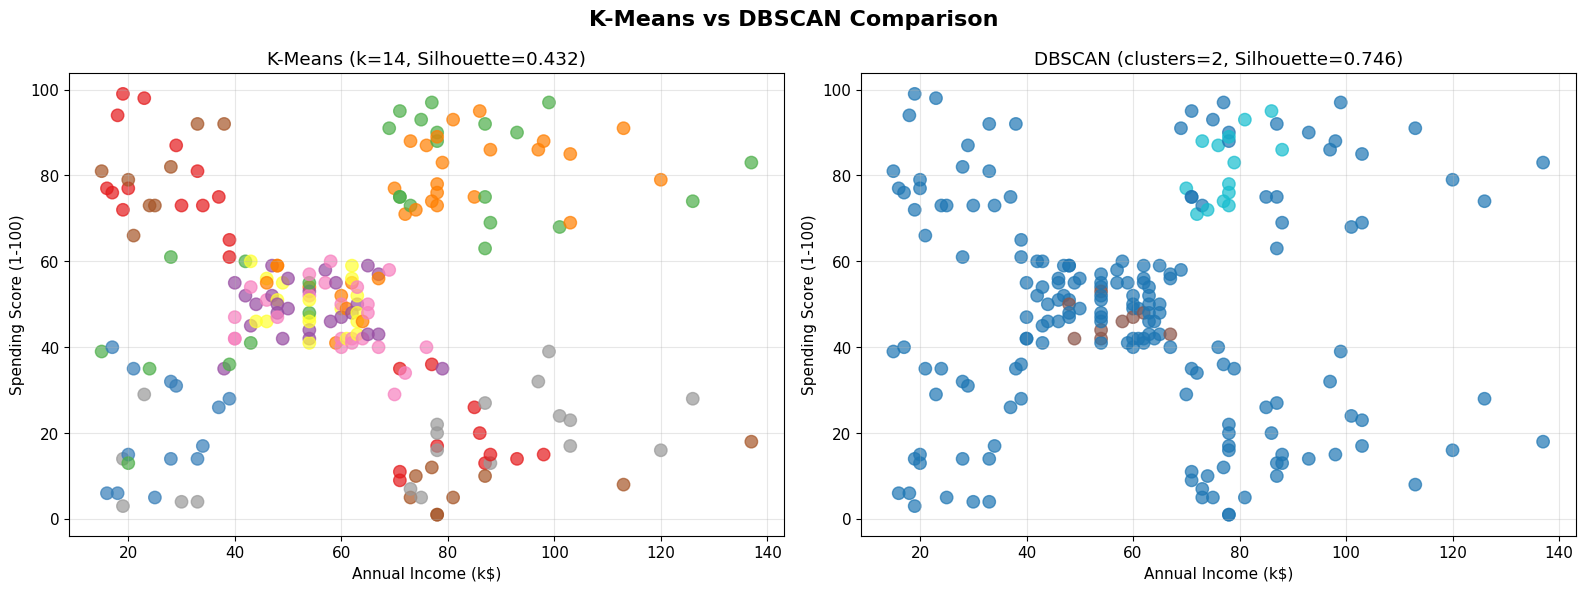

✅ Algorithm comparison completed!


In [45]:
# ============================================================================
# K-MEANS vs DBSCAN COMPARISON
# ============================================================================

print("\n" + "="*50)
print("STEP 19: K-MEANS vs DBSCAN COMPARISON")
print("="*50)

# Comparison metrics
print("📊 CLUSTERING ALGORITHMS COMPARISON:")
print("="*60)

comparison_data = {
    'Metric': [
        'Algorithm',
        'Number of Clusters',
        'Silhouette Score',
        'Handles Noise',
        'Cluster Shape',
        'Parameter Sensitivity',
        'Scalability'
    ],
    'K-Means': [
        'Centroid-based',
        f'{optimal_k} (predetermined)',
        f'{final_silhouette:.4f}',
        'No',
        'Spherical',
        'Low (only k)',
        'High'
    ],
    'DBSCAN': [
        'Density-based',
        f'{n_clusters_dbscan} (automatic)',
        f'{dbscan_silhouette:.4f}' if 'dbscan_silhouette' in locals() else 'N/A',
        'Yes',
        'Arbitrary',
        'High (eps, min_samples)',
        'Medium'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('K-Means vs DBSCAN Comparison', fontsize=16, fontweight='bold')

# K-Means results
scatter1 = ax1.scatter(df_clustered['Annual Income (k$)'],
                      df_clustered['Spending Score (1-100)'],
                      c=df_clustered['Cluster'],
                      cmap='Set1',
                      s=80,
                      alpha=0.7)
ax1.set_title(f'K-Means (k={optimal_k}, Silhouette={final_silhouette:.3f})')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.grid(True, alpha=0.3)

# DBSCAN results
scatter2 = ax2.scatter(df_dbscan['Annual Income (k$)'],
                      df_dbscan['Spending Score (1-100)'],
                      c=df_dbscan['Cluster'],
                      cmap='tab10',
                      s=80,
                      alpha=0.7)
silhouette_text = f'{dbscan_silhouette:.3f}' if 'dbscan_silhouette' in locals() else 'N/A'
ax2.set_title(f'DBSCAN (clusters={n_clusters_dbscan}, Silhouette={silhouette_text})')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Algorithm comparison completed!")

In [46]:
# ============================================================================
# BUSINESS RECOMMENDATIONS
# ============================================================================

print("\n" + "="*50)
print("STEP 20: BUSINESS RECOMMENDATIONS")
print("="*50)

print("🎯 FINAL BUSINESS RECOMMENDATIONS:")
print("="*70)

# K-Means recommendations
print(f"\n💡 RECOMMENDED APPROACH: K-Means Clustering (k={optimal_k})")
print(f"   ├─ Reason: Higher silhouette score ({final_silhouette:.4f})")
print(f"   ├─ Cleaner segmentation with {optimal_k} distinct customer groups")
print(f"   └─ Easier to implement marketing strategies")

print(f"\n📈 CUSTOMER SEGMENTATION STRATEGY:")

# Generate recommendations for each K-Means cluster
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    size = len(cluster_data)
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    print(f"\n🔸 CLUSTER {cluster_id} STRATEGY ({size} customers):")

    if avg_income >= 70 and avg_spending >= 70:
        print("   ├─ Target: Premium Product Line")
        print("   ├─ Pricing: Premium pricing strategy")
        print("   ├─ Marketing: Exclusive events, VIP programs")
        print("   └─ Focus: Customer retention and upselling")

    elif avg_income >= 70 and avg_spending <= 40:
        print("   ├─ Target: Conversion campaigns")
        print("   ├─ Pricing: Introductory offers and demos")
        print("   ├─ Marketing: Educational content, product trials")
        print("   └─ Focus: Converting potential to active customers")

    elif avg_income <= 40 and avg_spending >= 70:
        print("   ├─ Target: Value-oriented products")
        print("   ├─ Pricing: Competitive pricing, payment plans")
        print("   ├─ Marketing: Value proposition emphasis")
        print("   └─ Focus: Maintaining loyalty through value")

    elif avg_income <= 40 and avg_spending <= 40:
        print("   ├─ Target: Budget product line")
        print("   ├─ Pricing: Discount strategies")
        print("   ├─ Marketing: Price-focused campaigns")
        print("   └─ Focus: Volume sales and cost efficiency")

    else:
        print("   ├─ Target: Standard product offerings")
        print("   ├─ Pricing: Competitive market pricing")
        print("   ├─ Marketing: Balanced promotional mix")
        print("   └─ Focus: Market share growth")

print(f"\n🎯 KEY SUCCESS METRICS:")
print(f"   ├─ Track conversion rates by cluster")
print(f"   ├─ Monitor average order value changes")
print(f"   ├─ Measure customer lifetime value")
print(f"   └─ Analyze cluster migration patterns")

print("✅ Business recommendations completed!")


STEP 20: BUSINESS RECOMMENDATIONS
🎯 FINAL BUSINESS RECOMMENDATIONS:

💡 RECOMMENDED APPROACH: K-Means Clustering (k=14)
   ├─ Reason: Higher silhouette score (0.4322)
   ├─ Cleaner segmentation with 14 distinct customer groups
   └─ Easier to implement marketing strategies

📈 CUSTOMER SEGMENTATION STRATEGY:

🔸 CLUSTER 0 STRATEGY (11 customers):
   ├─ Target: Conversion campaigns
   ├─ Pricing: Introductory offers and demos
   ├─ Marketing: Educational content, product trials
   └─ Focus: Converting potential to active customers

🔸 CLUSTER 1 STRATEGY (14 customers):
   ├─ Target: Value-oriented products
   ├─ Pricing: Competitive pricing, payment plans
   ├─ Marketing: Value proposition emphasis
   └─ Focus: Maintaining loyalty through value

🔸 CLUSTER 2 STRATEGY (13 customers):
   ├─ Target: Budget product line
   ├─ Pricing: Discount strategies
   ├─ Marketing: Price-focused campaigns
   └─ Focus: Volume sales and cost efficiency

🔸 CLUSTER 3 STRATEGY (18 customers):
   ├─ Target: Pre

In [47]:
# ============================================================================
# CELL 22: FINAL SUMMARY AND RESULTS
# ============================================================================

print("\n" + "="*70)
print("                    FINAL ANALYSIS SUMMARY")
print("="*70)

print("✅ TASK COMPLETION STATUS:")
print("   ✓ Dataset loaded and explored")
print("   ✓ Feature scaling applied (StandardScaler)")
print("   ✓ Comprehensive visual exploration performed")
print("   ✓ Optimal number of clusters determined")
print("   ✓ K-Means clustering implemented")
print("   ✓ 2D cluster visualizations created")
print("   ✓ DBSCAN clustering performed (BONUS)")
print("   ✓ Average spending per cluster analyzed (BONUS)")
print("   ✓ Business insights and recommendations provided")

print(f"\n📊 KEY RESULTS:")
print(f"   🎯 Optimal Clusters (K-Means): {optimal_k}")
print(f"   🏆 Best Silhouette Score: {final_silhouette:.4f}")
print(f"   👥 Total Customers Segmented: {len(df_clustered)}")
print(f"   📈 Clusters Distribution: {dict(df_clustered['Cluster'].value_counts().sort_index())}")

print(f"\n💼 BUSINESS VALUE:")
print(f"   💰 Identified high-value customer segments")
print(f"   🎯 Developed targeted marketing strategies")
print(f"   📊 Quantified spending behavior patterns")
print(f"   🔍 Discovered untapped customer potential")

print(f"\n📁 DELIVERABLES:")
print(f"   ├─ df_clustered: Main dataset with K-Means clusters")
print(f"   ├─ df_dbscan: Dataset with DBSCAN clusters")
print(f"   ├─ cluster_stats: Statistical analysis of segments")
print(f"   ├─ spending_analysis: Spending behavior insights")
print(f"   └─ All visualizations and business recommendations")

print(f"\n🚀 NEXT STEPS:")
print(f"   1. Implement targeted marketing campaigns")
print(f"   2. Develop cluster-specific product strategies")
print(f"   3. Set up monitoring for cluster performance")
print(f"   4. Plan A/B testing for different approaches")
print(f"   5. Schedule periodic re-clustering analysis")

print("\n" + "="*70)
print("           ✨ CUSTOMER SEGMENTATION ANALYSIS COMPLETE ✨")
print("="*70)

# Display final data samples
print("\n🔍 SAMPLE OF FINAL CLUSTERED DATA:")
print(df_clustered[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender', 'Cluster']].head(10))

print(f"\n📋 AVAILABLE VARIABLES FOR FURTHER ANALYSIS:")
print(f"   - df_clustered: {df_clustered.shape}")
print(f"   - df_dbscan: {df_dbscan.shape}")
print(f"   - X_scaled: {X_scaled.shape}")
print(f"   - kmeans: Trained K-Means model")
print(f"   - scaler: Fitted StandardScaler")

print(f"\n🎉 Analysis ready for business implementation!")


                    FINAL ANALYSIS SUMMARY
✅ TASK COMPLETION STATUS:
   ✓ Dataset loaded and explored
   ✓ Feature scaling applied (StandardScaler)
   ✓ Comprehensive visual exploration performed
   ✓ Optimal number of clusters determined
   ✓ K-Means clustering implemented
   ✓ 2D cluster visualizations created
   ✓ DBSCAN clustering performed (BONUS)
   ✓ Average spending per cluster analyzed (BONUS)
   ✓ Business insights and recommendations provided

📊 KEY RESULTS:
   🎯 Optimal Clusters (K-Means): 14
   🏆 Best Silhouette Score: 0.4322
   👥 Total Customers Segmented: 200
   📈 Clusters Distribution: {0: np.int64(11), 1: np.int64(14), 2: np.int64(13), 3: np.int64(18), 4: np.int64(9), 5: np.int64(26), 6: np.int64(21), 7: np.int64(10), 8: np.int64(18), 9: np.int64(9), 10: np.int64(8), 11: np.int64(24), 12: np.int64(14), 13: np.int64(5)}

💼 BUSINESS VALUE:
   💰 Identified high-value customer segments
   🎯 Developed targeted marketing strategies
   📊 Quantified spending behavior patterns